In [1]:
#PROJECTimport numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('energydata_complete.csv')

In [3]:
df.shape

(19735, 29)

In [4]:
#random shuffling to remove any bias in correlation-randomize the data index
shuffle_to_index = 19000
df = pd.concat([df.iloc[np.random.permutation(range(shuffle_to_index))], df.iloc[shuffle_to_index:]])

In [6]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
886,1/17/2016 20:40,100,20,22.426667,40.393333,20.89,39.333333,21.000000,40.466667,21.166667,...,17.890000,38.290000,-1.400,764.60,77.666667,2.666667,30.666667,-4.87,40.155952,40.155952
9690,3/19/2016 0:00,60,0,22.390000,36.400000,19.70,39.126667,21.790000,36.260000,20.200000,...,19.600000,37.760000,5.300,762.50,88.000000,3.000000,62.000000,3.50,43.328044,43.328044
1254,1/20/2016 10:00,90,10,18.260000,39.833333,16.89,39.260000,18.500000,38.000000,16.890000,...,15.890000,36.400000,-2.000,760.00,89.000000,2.000000,58.000000,-3.60,20.132955,20.132955
749,1/16/2016 21:50,190,20,23.260000,38.363333,22.10,37.900000,22.066667,41.966667,21.100000,...,17.700000,39.900000,0.483,764.85,97.666667,2.500000,21.500000,0.15,33.790406,33.790406
2083,1/26/2016 4:10,50,0,20.633333,43.933333,19.89,43.400000,20.600000,44.290000,19.790000,...,17.066667,48.863333,7.920,764.05,93.166667,2.833333,29.000000,6.93,15.409150,15.409150


In [7]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
886,1/17/2016 20:40,100,20,22.426667,40.393333,20.89,39.333333,21.000000,40.466667,21.166667,...,17.890000,38.290000,-1.400,764.60,77.666667,2.666667,30.666667,-4.87,40.155952,40.155952
9690,3/19/2016 0:00,60,0,22.390000,36.400000,19.70,39.126667,21.790000,36.260000,20.200000,...,19.600000,37.760000,5.300,762.50,88.000000,3.000000,62.000000,3.50,43.328044,43.328044
1254,1/20/2016 10:00,90,10,18.260000,39.833333,16.89,39.260000,18.500000,38.000000,16.890000,...,15.890000,36.400000,-2.000,760.00,89.000000,2.000000,58.000000,-3.60,20.132955,20.132955
749,1/16/2016 21:50,190,20,23.260000,38.363333,22.10,37.900000,22.066667,41.966667,21.100000,...,17.700000,39.900000,0.483,764.85,97.666667,2.500000,21.500000,0.15,33.790406,33.790406
2083,1/26/2016 4:10,50,0,20.633333,43.933333,19.89,43.400000,20.600000,44.290000,19.790000,...,17.066667,48.863333,7.920,764.05,93.166667,2.833333,29.000000,6.93,15.409150,15.409150


In [8]:
#drop irrelevant columns
df.drop(['date','lights',],axis=1,inplace=True)

In [9]:
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
886,100,22.426667,40.393333,20.89,39.333333,21.000000,40.466667,21.166667,37.656667,20.700000,...,17.890000,38.290000,-1.400,764.60,77.666667,2.666667,30.666667,-4.87,40.155952,40.155952
9690,60,22.390000,36.400000,19.70,39.126667,21.790000,36.260000,20.200000,34.626667,18.463333,...,19.600000,37.760000,5.300,762.50,88.000000,3.000000,62.000000,3.50,43.328044,43.328044
1254,90,18.260000,39.833333,16.89,39.260000,18.500000,38.000000,16.890000,36.500000,18.993333,...,15.890000,36.400000,-2.000,760.00,89.000000,2.000000,58.000000,-3.60,20.132955,20.132955
749,190,23.260000,38.363333,22.10,37.900000,22.066667,41.966667,21.100000,40.060000,18.790000,...,17.700000,39.900000,0.483,764.85,97.666667,2.500000,21.500000,0.15,33.790406,33.790406
2083,50,20.633333,43.933333,19.89,43.400000,20.600000,44.290000,19.790000,45.433333,17.700000,...,17.066667,48.863333,7.920,764.05,93.166667,2.833333,29.000000,6.93,15.409150,15.409150


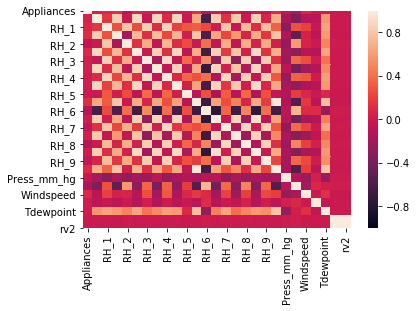

In [10]:
sns.heatmap(df.corr(),vmin=-1,vmax=1)

In [11]:
df.corr(method ='kendall')

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.173869,0.041802,0.214549,-0.082822,0.153314,-0.041124,0.145514,-0.013776,0.133212,...,0.117577,-0.115478,0.150849,-0.068617,-0.188432,0.082784,-0.002834,0.052123,-0.006543,-0.006543
T1,0.173869,1.000000,0.094225,0.657760,0.000107,0.698082,-0.010292,0.656698,0.077916,0.685181,...,0.621499,0.041627,0.470995,-0.090415,-0.203084,-0.041053,-0.026189,0.382614,-0.005127,-0.005127
RH_1,0.041802,0.094225,1.000000,0.197266,0.609414,0.124938,0.673903,0.041207,0.728573,0.108559,...,0.033867,0.558051,0.257108,-0.218106,0.157316,0.140399,-0.012261,0.448601,-0.000889,-0.000889
T2,0.214549,0.657760,0.197266,1.000000,-0.058473,0.507287,0.100676,0.527505,0.184335,0.498218,...,0.431003,0.106905,0.559839,-0.100214,-0.290690,0.088018,-0.020667,0.388972,-0.006898,-0.006898
RH_2,-0.082822,0.000107,0.609414,-0.058473,1.000000,0.083263,0.506421,-0.032317,0.541701,0.076147,...,0.021696,0.493517,0.115948,-0.173817,0.337718,0.048886,-0.011771,0.373408,0.004961,0.004961
T3,0.153314,0.698082,0.124938,0.507287,0.083263,1.000000,-0.018518,0.628428,0.071963,0.711661,...,0.725287,0.071472,0.478823,-0.132434,-0.175077,-0.054044,-0.047311,0.429159,-0.003666,-0.003666
RH_3,-0.041124,-0.010292,0.673903,0.100676,0.506421,-0.018518,1.000000,-0.100069,0.712470,-0.033465,...,-0.132283,0.622076,0.089229,-0.193654,0.229050,0.133758,0.007764,0.283458,0.000031,0.000031
T4,0.145514,0.656698,0.041207,0.527505,-0.032317,0.628428,-0.100069,1.000000,-0.038946,0.654411,...,0.672769,-0.033627,0.449436,-0.036642,-0.241406,-0.109231,-0.054089,0.323477,-0.002406,-0.002406
RH_4,-0.013776,0.077916,0.728573,0.184335,0.541701,0.071963,0.712470,-0.038946,1.000000,0.064449,...,-0.036408,0.631155,0.213286,-0.215923,0.211719,0.172242,-0.005927,0.437862,-0.001174,-0.001174
T5,0.133212,0.685181,0.108559,0.498218,0.076147,0.711661,-0.033465,0.654411,0.064449,1.000000,...,0.737162,0.035810,0.435837,-0.128624,-0.160377,-0.087038,-0.039599,0.395242,-0.004515,-0.004515


In [12]:
#drop  columns with no meaninful correlation
df.drop(['Visibility','rv1','rv2',],axis=1,inplace=True)

# LINEAR REGRESSION MODEL

In [13]:
X=df.drop('Appliances',axis=1)
y=df['Appliances']

In [14]:
#Splitting datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [15]:
#Scaling  the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

In [ ]:
#import libs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [16]:
# RUN GRIDSEARCH FOR BEST PARAMETERS
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X_train, y_train)
#print()"r2 / variance : ", grid.best_score_print("Residual sum of squares: %.2f"% np.mean((grid.predict(X_test) - y_test) ** 2))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
print("r2 / variance : ", grid.best_score_)

r2 / variance :  0.14426943642023843


In [18]:
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

Residual sum of squares: 9036.49


In [19]:
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [21]:
#Prediction
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(copy_X=True,fit_intercept=True)
lin_reg.fit(X_train_sc,y_train)
y_pred = lin_reg.predict(X_test_sc)


In [22]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test,y_pred)
rmse = sqrt(mse)
score = lin_reg.score(X_test_sc, y_test)

In [23]:
print("R-Square : ", score)
print("Mean Square Error: " ,mse)
print("Root Mean Square Error: " ,rmse)

R-Square :  0.13947859033907417
Mean Square Error:  9037.007927427547
Root Mean Square Error:  95.06317860995154


In [24]:
import statsmodels.api as sm
X2_train=sm.add_constant(X_train_sc)
X2_test=sm.add_constant(X_test_sc)
ols=sm.OLS(y_train,X_train_sc)
lr=ols.fit()
lr.params

x1     -0.713399
x2     64.805674
x3    -43.684309
x4    -58.682657
x5     51.379046
x6     16.157983
x7      4.882714
x8      8.696013
x9     -0.721070
x10     1.952374
x11    41.752428
x12    11.141922
x13     2.171938
x14    -9.571376
x15    21.326287
x16   -31.208955
x17   -43.932859
x18    -6.238293
x19   -44.849999
x20     1.370742
x21    -9.971570
x22     5.391683
x23    15.182255
dtype: float64

In [25]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:             Appliances   R-squared (uncentered):                   0.078
Model:                            OLS   Adj. R-squared (uncentered):              0.076
Method:                 Least Squares   F-statistic:                              54.12
Date:                Mon, 16 Mar 2020   Prob (F-statistic):                   2.57e-238
Time:                        16:50:06   Log-Likelihood:                         -93696.
No. Observations:               14801   AIC:                                  1.874e+05
Df Residuals:                   14778   BIC:                                  1.876e+05
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
while lr.pvalues.max()>0.05:
    X2_train=np.delete(X_train_sc,lr.pvalues.values.argmax(),axis=1)
    X2_test=np.delete(X_test_sc ,lr.pvalues.values.argmax(),axis=1)
    ols=sm.OLS(y_train,X_train)
    lr=ols.fit()

In [ ]:
print(lr.summary())

# KNN REGRESSION

In [26]:
X=df.drop('Appliances',axis=1)
y=df['Appliances']

In [27]:
#Splitting datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [59]:
#grid search-best params

from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
parameters = [{'weights': ['uniform'], 
               'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]

grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100],
                          'weights': ['uniform']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
grid.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [61]:
grid.best_score_

0.43155858850203266

In [62]:
#get k fold stdv
grid.cv_results_['std_test_score'][grid.best_index_]

0.034346943106204085

In [31]:
#Fitting K-NN to the Training set & making prediction
from sklearn.neighbors import KNeighborsRegressor
KNN_reg = KNeighborsRegressor(n_neighbors=5,weights='uniform')
KNN_reg.fit(X_train_sc,y_train)
y_pred = KNN_reg.predict(X_test_sc)

In [32]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test,y_pred)
rmse = sqrt(mse)
score = KNN_reg.score(X_test_sc, y_test)

In [33]:
print("R-Square : ", score)
print("Mean Square Error: " ,mse)
print("Root Mean Square Error: " ,rmse)

R-Square :  0.47596924181585143
Mean Square Error:  5503.256586947709
Root Mean Square Error:  74.18393752658125


# RANDOM FOREST-REGRESSION MODEL

In [36]:
#USING SAME DATA SET
X=df.drop('Appliances',axis=1)
y=df['Appliances']

In [37]:
#Splitting datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [45]:
#import libs
from sklearn.ensemble import RandomForestRegressor

In [48]:
estimator = RandomForestRegressor()
para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }
grid = GridSearchCV(estimator,para_grids, cv=10)
grid.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
  

In [54]:
grid.best_params_

{'bootstrap': False, 'max_features': 'log2', 'n_estimators': 100}

In [55]:
grid.best_score_

0.6014333185046434

In [56]:
#get k fold stdv
grid.cv_results_['std_test_score'][grid.best_index_]

0.02759579918620574

In [28]:
#import libs
from sklearn.ensemble import RandomForestRegressor

In [52]:
#Using Random Forest Regressor
reg = RandomForestRegressor(bootstrap=False,max_features='log2',n_estimators=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Random Forest Regressor Score : ", reg.score(X_test, y_test))
print("Random Forest RMSE : ", sqrt(mean_squared_error(y_test,y_pred)))
print("Random Forest MSE : ",mean_squared_error(y_test,y_pred))

Random Forest Regressor Score :  0.6338539880586809
Random Forest RMSE :  62.009559424922244
Random Forest MSE :  3845.185460072963


In [ ]:
#K fold corss validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(reg, X,y, cv=10)
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

# SVR-REGRESSION

In [32]:
X=df.drop('Appliances',axis=1)
y=df['Appliances']

In [33]:
#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)

In [34]:
#PROJECTimport numpy as np
from sklearn.svm import SVR
from math import sqrt

In [38]:
#Using Poly kernal with SVM
reg = SVR(kernel ='poly', degree=1)
reg.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
#import libs
from sklearn.ensemble import RandomForestRegressor

In [40]:
y_pred = reg.predict(X_test)

In [41]:
score = reg.score(X_test,y_test)
mse = mean_squared_error(y_test,y_pred)
rmse = sqrt(mse)
print("R-square: ", score)
print("Mean Square Error: ", mse)
print("Root Mean Square Error:", rmse)

R-square:  0.0008408050004988787
Mean Square Error:  10965.756630026874
Root Mean Square Error: 104.7175087080803


In [42]:
#K fold corss validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(reg, X,y, cv=10)
print('K-fold Accuracy',accuracies)
print('K-fold Mean Accuracy',accuracies.mean())
print('Stdv K-fold',accuracies.std())

K-fold Accuracy [-0.11179767  0.04994542 -0.01742273  0.00245555 -0.00464761  0.04238417
  0.01011454  0.05509853  0.05733466 -0.00694915]
K-fold Mean Accuracy 0.0076515714317672125
Stdv K-fold 0.04796780565314209


# ADABOOST-REGRESSION

In [43]:
X=df.drop('Appliances',axis=1)
y=df['Appliances']

In [44]:
#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)
rng = np.random.RandomState(0)

In [47]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)


In [48]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=300,
                  random_

In [49]:
# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [50]:
score = regr_2.score(X_test,y_test)
mse = mean_squared_error(y_test,y_2)
rmse = sqrt(mse)
print("R-square: ", score)
print("Mean Square Error: ", mse)
print("Root Mean Square Error:", rmse)

R-square:  -4.177871565206527
Mean Square Error:  56827.05992173694
Root Mean Square Error: 238.3842694511048


In [53]:
#K fold corss validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(regr_2, X,y, cv=10)
print('K-fold Accuracy',accuracies)
print('K-fold Mean Accuracy',accuracies.mean())
print('Stdv K-fold',accuracies.std())

K-fold Accuracy [-0.25341379 -5.91536757 -6.16576534 -3.10858836 -4.23331978 -6.2753169
 -2.34827747 -8.78150095 -7.69437093 -9.28533273]
K-fold Mean Accuracy -5.406125381770297
Stdv K-fold 2.7536225570737667


In [52]:
regr_2.feature_importances_

array([0.01912405, 0.10636328, 0.04261263, 0.07253478, 0.07074625,
       0.05327121, 0.02822376, 0.02944033, 0.03228001, 0.10363493,
       0.01525536, 0.03883946, 0.01867346, 0.02270336, 0.03251732,
       0.02523322, 0.01756489, 0.02710558, 0.02929789, 0.07900279,
       0.06447291, 0.02034926, 0.05075329])